 <h1 style="text-align: center; color: RED">RFM ANALİZİ İLE FLO MÜŞTERİ SEGMENTASYONU</h1>

 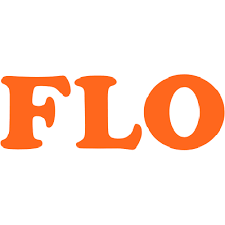

<span style="color: blue; font-weight: bold;">İŞ PROBLEMİ</span> 

Online ayakkabı mağazası olan FLO müşterilerini
segmentlere ayırıp bu segmentlere göre pazarlama
stratejileri belirlemek istiyor. Buna yönelik olarak
müşterilerin davranışları tanımlanacak ve bu
davranışlardaki öbeklenmelere göre gruplar oluşturulacak.


<span style="color: blue; font-weight: bold;">VERİ SETİ HİKAYESİ</span> 

Veri seti son alışverişlerini 2020 - 2021 yıllarında OmniChannel(hem online hem offline alışveriş yapan) olarak yapan müşterilerin geçmiş alışveriş davranışlarından
elde edilen bilgilerden oluşmaktadır.

* master_id: Eşsiz müşteri numarası
* order_channel : Alışveriş yapılan platforma ait hangi kanalın kullanıldığı (Android, ios, Desktop, Mobile, Offline)
* last_order_channel : En son alışverişin yapıldığı kanal
* first_order_date : Müşterinin yaptığı ilk alışveriş tarihi
* last_order_date : Müşterinin yaptığı son alışveriş tarihi
* last_order_date_online : Muşterinin online platformda yaptığı son alışveriş tarihi
* last_order_date_offline : Muşterinin offline platformda yaptığı son alışveriş tarihi
* order_num_total_ever_online : Müşterinin online platformda yaptığı toplam alışveriş sayısı
* order_num_total_ever_offline : Müşterinin offline'da yaptığı toplam alışveriş sayısı
* customer_value_total_ever_offline : Müşterinin offline alışverişlerinde ödediği toplam ücret
* customer_value_total_ever_online : Müşterinin online alışverişlerinde ödediği toplam ücret
* interested_in_categories_12 : Müşterinin son 12 ayda alışveriş yaptığı kategorilerin listesi

<span style="color: blue; font-weight: bold;">GÖREV 1:VERİYİ ANLAMA VE HAZIRLAMA</span> 

In [38]:
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width',500)
pd.set_option('display.float.format',lambda x: '%.3f' % x)

**Adım1:** flo_data_20K.csv verisini okuyunuz.Dataframe’in kopyasını oluşturunuz.

In [25]:
df_ = pd.read_csv("C:\\Users\\ASLI\\Desktop\\Data Scientist Bootcamp\\3.CRM Analytics\\resim\\flo_data_20k.csv")

In [27]:
df = df_.copy()

**Adım2:** 
           Veri setinde
           
           a. İlk 10 gözlem,
           b. Değişken isimleri,
           c. Betimsel istatistik,
           d. Boş değer,
           e. Değişken tipleri, incelemesi yapınız.

In [40]:
df.head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR]
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.000,2.000,150.870,49.990,[KADIN]
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,Android App,Android App,2020-03-04,2020-10-18,2020-10-18,2020-03-04,3.000,1.000,59.990,315.940,[AKTIFSPOR]
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,Mobile,Offline,2020-05-15,2020-08-12,2020-05-15,2020-08-12,1.000,1.000,49.990,113.640,[COCUK]
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.000,2.000,120.480,934.210,"[ERKEK, COCUK, KADIN]"
9,1143f032-440d-11ea-8b43-000d3a38a36f,Mobile,Mobile,2019-07-30,2020-10-04,2020-10-04,2019-07-30,1.000,1.000,69.980,95.980,"[KADIN, AKTIFSPOR]"


In [42]:
df.columns

Index(['master_id', 'order_channel', 'last_order_channel', 'first_order_date', 'last_order_date', 'last_order_date_online', 'last_order_date_offline', 'order_num_total_ever_online', 'order_num_total_ever_offline', 'customer_value_total_ever_offline', 'customer_value_total_ever_online', 'interested_in_categories_12'], dtype='object')

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.000,3.111,4.226,1.000,1.000,2.000,4.000,200.000
order_num_total_ever_offline,19945.000,1.914,2.063,1.000,1.000,1.000,2.000,109.000
customer_value_total_ever_offline,19945.000,253.923,301.533,10.000,99.990,179.980,319.970,18119.140
customer_value_total_ever_online,19945.000,497.322,832.602,12.990,149.980,286.460,578.440,45220.130


In [46]:
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

**Adım3:** Omnichannel müşterilerin hem online'dan hemde offline platformlardan alışveriş yaptığını ifade etmektedir. Her bir müşterinin toplam
alışveriş sayısı ve harcaması için yeni değişkenler oluşturunuz.

In [53]:
df['total_order_num'] = df['order_num_total_ever_online'] + df['order_num_total_ever_offline']

In [55]:
df['total_customer_value'] = df['customer_value_total_ever_offline'] + df['customer_value_total_ever_online']

In [57]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order_num,total_customer_value
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN],5.000,939.370
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.000,2013.550
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]",5.000,585.320
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]",2.000,121.970
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR],2.000,209.980


**Adım4:** Değişken tiplerini inceleyiniz. Tarih ifade eden değişkenlerin tipini date'e çeviriniz.

In [96]:
date_col = df.columns[df.columns.str.contains('date')]

In [98]:
date_col

Index(['first_order_date', 'last_order_date', 'last_order_date_online', 'last_order_date_offline'], dtype='object')

In [102]:
df[date_col] = df[date_col].apply(pd.to_datetime)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

**Adım5:** Alışveriş kanallarındaki müşteri sayısının, toplam alınan ürün sayısının ve toplam harcamaların dağılımına bakınız.

In [109]:
df['order_channel'].value_counts()

order_channel
Android App    9495
Mobile         4882
Ios App        2833
Desktop        2735
Name: count, dtype: int64

In [119]:
df.groupby('order_channel').agg({'master_id':'count',
                                 'total_order_num':['sum','mean'],
                                 'total_customer_value':['sum','mean']})

master_id total_order_num       total_customer_value        
                  count             sum  mean                  sum    mean
order_channel                                                             
Android App        9495       52269.000 5.505          7819062.760 823.493
Desktop            2735       10920.000 3.993          1610321.460 588.783
Ios App            2833       15351.000 5.419          2525999.930 891.634
Mobile             4882       21679.000 4.441          3028183.160 620.275

**Adım6:** En fazla kazancı getiren ilk 10 müşteriyi sıralayınız.

In [ ]:
df.sort_values('total_customer_value', ascending=False).head(10)

**Adım7:** En fazla siparişi veren ilk 10 müşteriyi sıralayınız.

In [ ]:
df.sort_values('total_order_num', ascending=False).head(10)

**Adım8:** Veri ön hazırlık sürecini fonksiyonlaştırınız.

In [134]:
def data_prep(dataframe):
    dataframe['total_order_num'] = dataframe['order_num_total_ever_online'] + dataframe['order_num_total_ever_offline']
    dataframe['total_customer_value'] = dataframe['customer_value_total_ever_offline'] + dataframe['customer_value_total_ever_online']
    date_col = dataframe.columns[dataframe.columns.str.contains('date')]
    dataframe[date_col] = dataframe[date_col].apply(pd.to_datetime)
    return dataframe

<span style="color: blue; font-weight: bold;">GÖREV 2 : RFM METRİKLERİNİN HESAPLANMASI</span> 

**Adım 1:** Recency, Frequency ve Monetary tanımlarını yapınız.

Bu kısımda her bir müşteri özelinde recency, frequency,monetary değerlerini hesaplamayı amaçlıyoruz.

Recency:Müşterinin yeniliğini sıcaklığını ifade eder.

Bunun matematiksel karşılığı= **(analizin yapıldığı tarih-ilgili müşterinin son satın alma tarihi)**

Frequency:Müşetirinin yaptığı toplam satın alma

Monetary: Müşterinin yaptığı toplam satın almadan kazanılan para

**Adım 2:** Müşteri özelinde Recency, Frequency ve Monetary metriklerini hesaplayınız.

**Adım 3:** Hesapladığınız metrikleri rfm isimli bir değişkene atayınız.

**Adım 4:** Oluşturduğunuz metriklerin isimlerini recency, frequency ve monetary olarak değiştiriniz.

In [167]:
rfm = pd.DataFrame()

In [147]:
df['last_order_date'].max()

Timestamp('2021-05-30 00:00:00')

In [149]:
df['last_order_date_online'].max()

Timestamp('2021-05-30 00:00:00')

In [151]:
df['last_order_date_offline'].max()

Timestamp('2021-05-28 00:00:00')

In [155]:
analys_date = dt.datetime(2021,6,1)

In [169]:
rfm['master_id'] = df['master_id'] 

In [173]:
rfm['recency'] = (analys_date - df['last_order_date']).dt.days

In [175]:
rfm

,master_id,recency
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105
2,69b69676-1a40-11ea-941b-000d3a38a36f,186
3,1854e56c-491f-11eb-806e-000d3a38a36f,135
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86
...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,331
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,161
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,8
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,108


In [177]:
rfm['frequency'] = df['total_order_num']

In [179]:
rfm['monetary'] = df['total_customer_value']

In [181]:
rfm

,master_id,recency,frequency,monetary
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.000,939.370
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.000,2013.550
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.000,585.320
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.000,121.970
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.000,209.980
...,...,...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,331,3.000,401.960
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,161,2.000,390.470
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,8,3.000,632.940
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,108,6.000,1009.770


<span style="color: blue; font-weight: bold;">GÖREV 3 : RF SKORLARININ HESAPLANMASI</span> 

**Adım 1:** Recency, Frequency ve Monetary metriklerini qcut yardımı ile 1-5 arasında skorlara çeviriniz.

**Adım 2:** Bu skorları recency_score, frequency_score ve monetary_score olarak kaydediniz.

In [194]:
rfm['recency_score'] = pd.qcut(rfm['recency'],5, labels=[5,4,3,2,1])

In [198]:
rfm['frequency_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])

In [200]:
rfm['monetary_score'] = pd.qcut(rfm['monetary'], 5, labels=[1,2,3,4,5])

In [202]:
rfm.head()

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.000,939.370,3,4,4
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.000,2013.550,3,5,5
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.000,585.320,2,4,3
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.000,121.970,3,1,1
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.000,209.980,3,1,1


**Adım 3:** recency_score ve frequency_score’u tek bir değişken olarak ifade ediniz ve RF_SCORE olarak kaydediniz.

In [207]:
rfm['RF_SCORE'] = rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str) 

In [209]:
rfm.head()

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.000,939.370,3,4,4,34
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.000,2013.550,3,5,5,35
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.000,585.320,2,4,3,24
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.000,121.970,3,1,1,31
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.000,209.980,3,1,1,31


<span style="color: blue; font-weight: bold;">GÖREV 4 : RF SKORLARININ SEGMENT OLARAK TANIMLANMASI</span> 

**Adım 1:** Oluşturulan RF skorları için segment tanımlamaları yapınız.

In [214]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [216]:
rfm['segment'] = rfm['RF_SCORE'].replace(seg_map, regex=True)

In [218]:
rfm

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.000,939.370,3,4,4,34,loyal_customers
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.000,2013.550,3,5,5,35,loyal_customers
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.000,585.320,2,4,3,24,at_Risk
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.000,121.970,3,1,1,31,about_to_sleep
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.000,209.980,3,1,1,31,about_to_sleep
...,...,...,...,...,...,...,...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,331,3.000,401.960,1,3,2,13,at_Risk
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,161,2.000,390.470,2,2,2,22,hibernating
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,8,3.000,632.940,5,3,3,53,potential_loyalists
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,108,6.000,1009.770,3,4,4,34,loyal_customers


<span style="color: blue; font-weight: bold;">GÖREV 5 : AKSİYON ZAMANI</span> 

**Adım1:** Segmentlerin recency, frequnecy ve monetary ortalamalarını inceleyiniz.

In [229]:
rfm.groupby('segment').agg({'recency':'mean',
                           'frequency':'mean',
                            'monetary':'mean'})

,recency,frequency,monetary
segment,,,
about_to_sleep,113.785,2.401,359.009
at_Risk,241.607,4.472,646.610
cant_loose,235.444,10.698,1474.468
champions,17.107,8.934,1406.625
hibernating,247.950,2.394,366.267
loyal_customers,82.595,8.375,1216.819
need_attention,113.829,3.728,562.143
new_customers,17.918,2.000,339.956
potential_loyalists,37.156,3.304,533.184


**Adım2:** RFM analizi yardımıyla aşağıda verilen 2 case için ilgili profildeki müşterileri bulun ve müşteri id'lerini csv olarak kaydediniz.

**a.** FLO bünyesine yeni bir kadın ayakkabı markası dahil ediyor. Dahil ettiği markanın ürün fiyatları genel müşteri
tercihlerinin üstünde. Bu nedenle markanın tanıtımı ve ürün satışları için ilgilenecek profildeki müşterilerle özel olarak
iletişime geçmek isteniliyor. Sadık müşterilerinden(champions, loyal_customers) ve kadın kategorisinden alışveriş
yapan kişiler özel olarak iletişim kurulacak müşteriler. Bu müşterilerin id numaralarını csv dosyasına kaydediniz.

In [233]:
rfm['interested_in_categories_12'] = df['interested_in_categories_12']

In [252]:
hedef_müsteri = rfm.loc[(rfm['segment'] == 'champions') | (rfm['segment']=='loyal_customers') & 
(rfm['interested_in_categories_12'].str.contains('KADIN', na=False)),'master_id']

In [ ]:
hedef_müsteri_id.to_csv('hedef_müsteri_id.csv')

**b.** Erkek ve Çocuk ürünlerinde %40'a yakın indirim planlanmaktadır. Bu indirimle ilgili kategorilerle ilgilenen geçmişte
iyi müşteri olan ama uzun süredir alışveriş yapmayan kaybedilmemesi gereken müşteriler, uykuda olanlar ve yeni
gelen müşteriler özel olarak hedef alınmak isteniyor. Uygun profildeki müşterilerin id'lerini csv dosyasına kaydediniz.

In [269]:
hedef_nüşteri2=rfm.loc[(rfm['segment'].isin(["cant_loose","hibernating","new_customers"])) & (rfm['interested_in_categories_12'].str.contains("ERKEK|ÇOCUK", na=False))]


In [271]:
hedef_nüşteri2

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment,interested_in_categories_12
19,2730793e-3908-11ea-85d6-000d3a38a36f,347,2.000,314.980,1,1,2,11,hibernating,[ERKEK]
21,7b289956-d691-11e9-93bc-000d3a38a36f,187,3.000,730.670,2,2,4,22,hibernating,"[ERKEK, KADIN]"
29,a46cc34a-a19f-11e9-a2fc-000d3a38a36f,184,2.000,175.980,2,1,1,21,hibernating,[ERKEK]
45,d45e704c-b13c-11e9-9757-000d3a38a36f,335,3.000,1095.390,1,2,5,12,hibernating,"[ERKEK, KADIN]"
48,1eb32dea-a409-11e9-a2fc-000d3a38a36f,162,3.000,271.970,2,2,1,22,hibernating,[ERKEK]
...,...,...,...,...,...,...,...,...,...,...
19894,0e16f220-ac68-11e9-a2fc-000d3a38a36f,353,2.000,244.490,1,2,1,12,hibernating,[ERKEK]
19899,3c799730-5b9f-11ea-b4c9-000d3a38a36f,232,2.000,179.980,2,2,1,22,hibernating,[ERKEK]
19928,8ef8cfc4-606f-11ea-8dd8-000d3a38a36f,335,2.000,238.480,1,2,1,12,hibernating,[ERKEK]
19932,13a5e98c-a824-11e9-a2fc-000d3a38a36f,208,9.000,1174.000,2,5,5,25,cant_loose,"[ERKEK, KADIN, AKTIFSPOR]"
